<a href="https://colab.research.google.com/github/WagnerMiron/introducao_a_ciencia_de_dados/blob/main/T%C3%B3picos_Especiais_em_Projetos_4_Atividade_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação das bibliotecas


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay

Criação do conjunto de dados sintéticos

In [ ]:
X, y = make_classification(n_samples=3000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Salvando dados antes da padronização
pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])]).to_csv('X_original.csv', index=False)

Padronização dos dados

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Salvando dados depois da padronização
pd.DataFrame(X_scaled, columns=[f'Feature_{i}' for i in range(X.shape[1])]).to_csv('X_scaled.csv', index=False)

Dividindo o conjunto de dados em treino e teste

In [ ]:
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_scaled, X_test_scaled, _, _ = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Treinando o algoritmo no conjunto de treino com kernels linear e polinomial

In [ ]:
kernels = ['linear', 'poly']
models_orig = {}
models_scaled = {}

for kernel in kernels:
    svm_orig = SVC(kernel=kernel, probability=True, random_state=42)
    svm_orig.fit(X_train_orig, y_train)
    models_orig[kernel] = svm_orig

    svm_scaled = SVC(kernel=kernel, probability=True, random_state=42)
    svm_scaled.fit(X_train_scaled, y_train)
    models_scaled[kernel] = svm_scaled

Avaliando os modelos com Matriz de Confusão e Curva ROC

<Figure size 640x480 with 0 Axes>

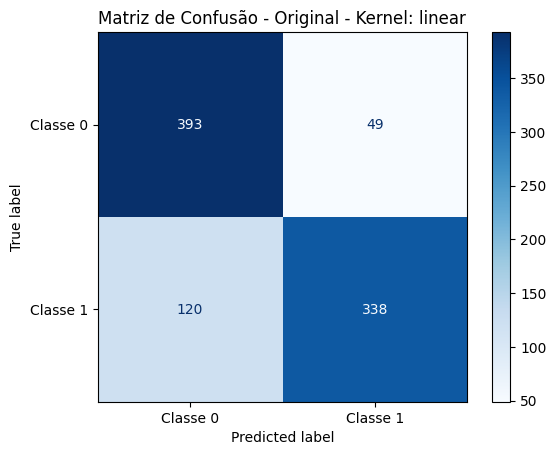

<Figure size 640x480 with 0 Axes>

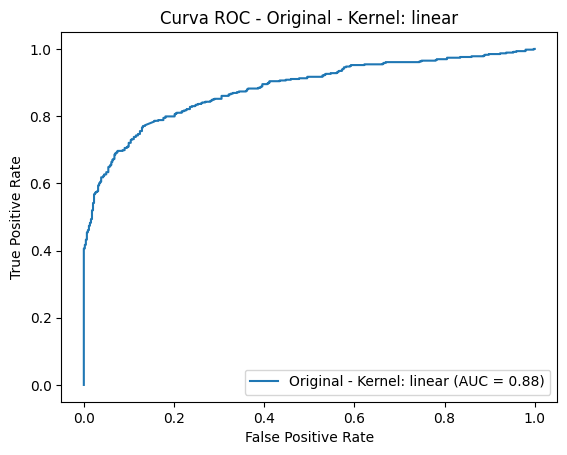

<Figure size 640x480 with 0 Axes>

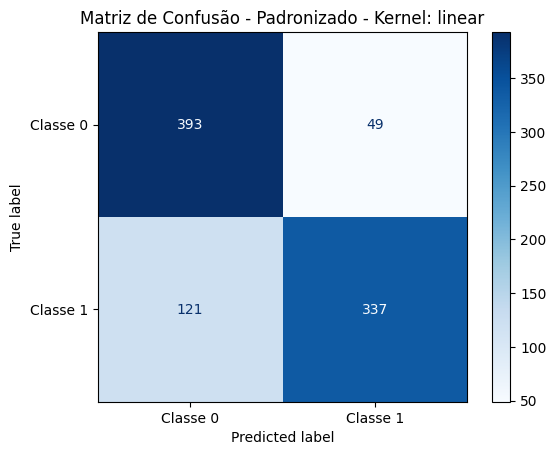

<Figure size 640x480 with 0 Axes>

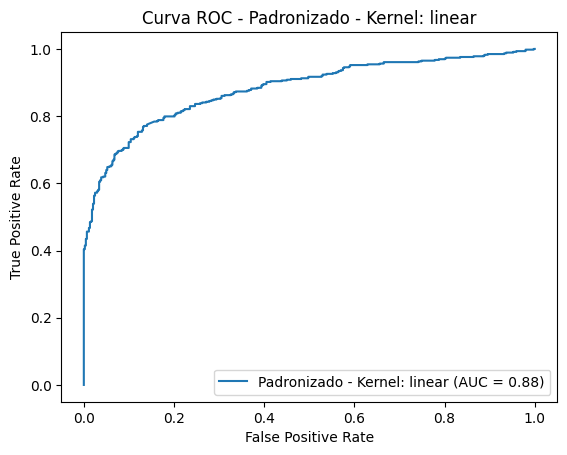

<Figure size 640x480 with 0 Axes>

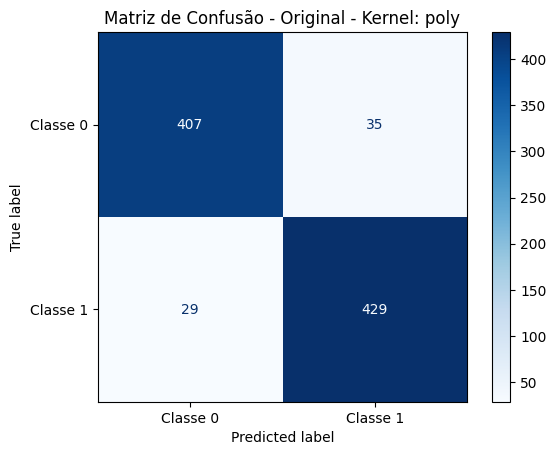

<Figure size 640x480 with 0 Axes>

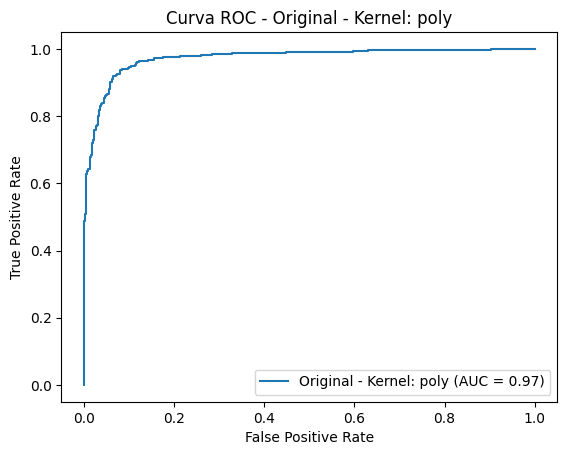

<Figure size 640x480 with 0 Axes>

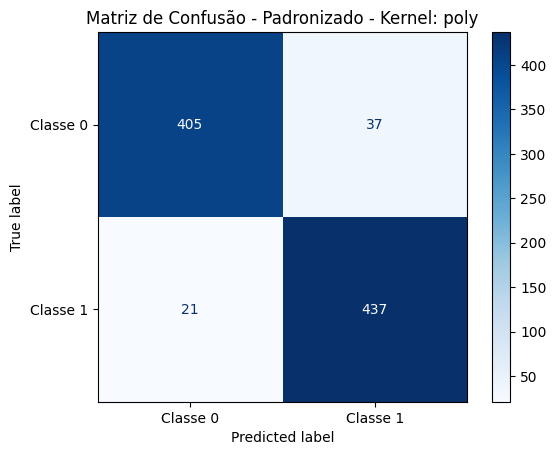

<Figure size 640x480 with 0 Axes>

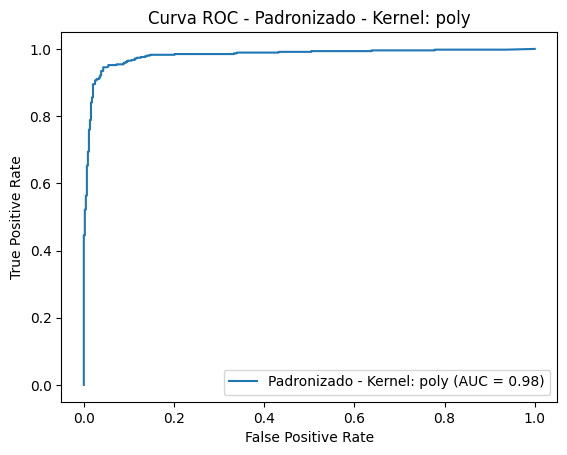

In [ ]:
def evaluate_model(model, X_test, y_test, title):
    y_pred = model.predict(X_test)

    # Matriz de Confusão
    plt.figure()
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"]).plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusão - {title}")
    plt.show()

    # Curva ROC
    plt.figure()
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=title).plot()
    plt.title(f"Curva ROC - {title}")
    plt.show()

# Avaliando os modelos com kernels linear e polinomial (com e sem padronização)
for kernel in kernels:
    evaluate_model(models_orig[kernel], X_test_orig, y_test, f'Original - Kernel: {kernel}')
    evaluate_model(models_scaled[kernel], X_test_scaled, y_test, f'Padronizado - Kernel: {kernel}')


A utilização de modelos SVM traz vantagens em problemas de classificação, principalmente por sua capacidade de lidar bem com dados de alta dimensionalidade. O algoritmo trabalha buscando a margem máxima de separação entre as classes, o que garante que a decisão seja tomada com base no melhor limite possível entre os dados. O uso de diferentes kernels, como o linear e o polinomial, permite que o SVM encontre padrões mais elaborados, adaptando-se a diferentes distribuições de dados.

Porém, o desempenho do SVM está diretamente ligado à forma como os dados são apresentados. Quando os dados não são padronizados, variáveis com magnitudes muito diferentes podem desbalancear o modelo. Por exemplo, se uma variável tem valores em milhares e outra varia entre 0 e 1, o SVM vai dar mais importância à primeira, distorcendo o cálculo das distâncias entre os pontos. Isso prejudica diretamente o kernel polinomial, que depende fortemente dessas distâncias para criar as fronteiras de separação. Como resultado, o modelo pode acabar criando uma fronteira de decisão mal ajustada, diminuindo a precisão na classificação.

Com a padronização, cada variável é ajustada para uma escala comum, normalmente com média zero e desvio padrão igual a um. Esse procedimento é essencial para que todas as variáveis contribuam de maneira equilibrada na criação das fronteiras de separação. A padronização também facilita a convergência do modelo, tornando os cálculos mais estáveis e consistentes. Nos experimentos, observa-se uma clara melhora nos resultados ao utilizar dados padronizados, principalmente nas métricas como a matriz de confusão e a curva ROC. Os erros de classificação diminuem, e a separação entre as classes se torna mais nítida, o que reflete diretamente na performance geral do modelo SVM.